# 画像メディア工学９回目
## 9. ２値画像処理（収縮・膨張と背景差分）
### ライブラリの読み込み（おまじない）

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Google colaboratoryで利用する場合の画像のアップロード
img06.pngをアップしてください

In [2]:
from google.colab import files
uploaded_file = files.upload()

### 画像読み込み
img06.pngは、２値化済．一般に，背景は黒(0)，前景は白(255)で表現される．

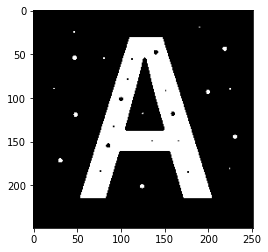

In [3]:
img = cv2.imread('img06.png', 0)  # モノクロ画像として読み込み
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255);

### 収縮処理
収縮処理には，OpenCVのcv2.erode()を利用する．
kernelによるフィルタリングを行い，kernel中の1の画素の場所のいずれかに**背景が含まれれば背景**と判断するので，前景部分が収縮する．
ここでも，$3\times3$の全てが1のフィルタを用いているので，8近傍のいずれかに背景を含むと背景となる．
iterationsは，処理の回数．

収縮処理を行うと背景中のノイズが除去され，前景中のノイズは大きくなる．
（iterations=1で除去しきれないノイズは，iterationsを大きくする，またはkernelを大きくすると除去できる）

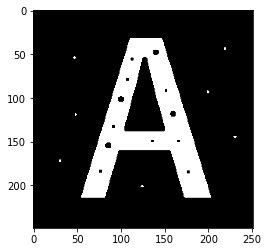

In [4]:
kernel = np.ones((3,3))
res = cv2.erode(img, kernel, iterations=1)
plt.imshow(res, cmap='gray', vmin = 0, vmax = 100);

### 膨張処理
膨張処理には，OpenCVのcv2.dilate()を利用する．
kernelによるフィルタリングを行い，kernel中の1の画素の場所のいずれかに**前景が含まれれば前景**と判断するので，前景部分が膨張する．
ここでは，$3\times3$の全てが1のフィルタを用いているので，8近傍のいずれかに前景を含むと前景となる．
iterationsは，処理の回数．

膨張処理を行うと前景中のノイズが除去され，背景中のノイズは大きくなる．（iterations=1で除去しきれないノイズは，iterationsを大きくする，またはkernelを大きくすると除去できる）

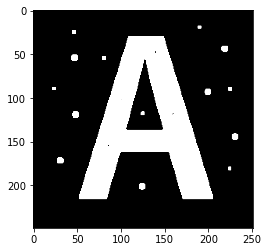

In [5]:
kernel = np.ones((3,3))
res = cv2.dilate(img, kernel, iterations=1)
plt.imshow(res, cmap='gray', vmin = 0, vmax = 100);

### オープニング処理
収縮の後に膨張を行う処理．cv2.erode()，cv2.dilate()を用いても良いが，cv2.morphologyEx()を用いると一行で実行できる．

前景の形状はほぼ変わらずに，背景のノイズ除去ができる．

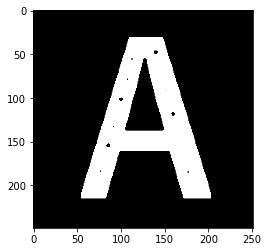

In [6]:
kernel = np.ones((5,5))
res = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# erode, dilateを用いる場合
#res = cv2.erode(img, kernel, iterations=1)
#res = cv2.dilate(res, kernel, iterations=1)

plt.imshow(res, cmap='gray', vmin = 0, vmax = 100);

### クロージング処理
膨張の後に収縮を行う処理．
cv2.erode()，cv2.dilate()を用いても良いが，cv2.morphologyEx()を用いると一行で実行できる（引数が異なる）．

前景の形状はほぼ変わらずに，前景中のノイズ除去ができる．

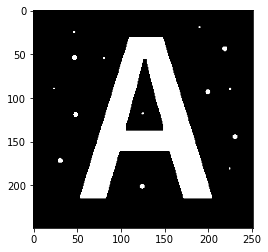

In [7]:
kernel = np.ones((5,5))
res = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# erode, dilateを用いる場合
#res = cv2.dilate(img, kernel, iterations=1)
#res = cv2.erode(res, kernel, iterations=1)

plt.imshow(res, cmap='gray', vmin = 0, vmax = 100);

### 課題
以下のコードで，ごく単純な背景差分結果が得られるので，適切な収縮・膨張処理を追加することで，人物領域のみが抽出できるようにしてください．具体的には，オープニング・クロージング処理ためのカーネルのサイズを適切に決定してください．

実行前には，課題用のファイル（img07a.png,img07b.png,img07c.png）をアップしてください．

※背景差分用のデータとしては，http://limu.ait.kyushu-u.ac.jp/dataset/ の屋内映像カメラパラメータ変化有 データセットを利用しています

In [8]:
from google.colab import files
uploaded_file = files.upload()

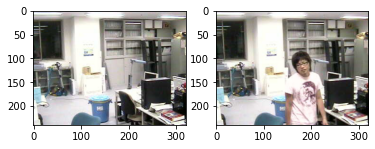

In [9]:
imga = cv2.imread('img07a.jpg')  # 背景画像の読み込み
imgb = cv2.imread('img07b.jpg')  # 人物画像の読み込み

# RGBの順番の入れ替え
imga = cv2.cvtColor(imga, cv2.COLOR_BGR2RGB)
imgb = cv2.cvtColor(imgb, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(imga)
plt.subplot(122)
plt.imshow(imgb)

### 背景差分画像の計算

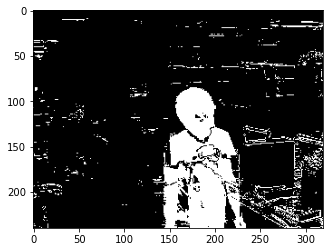

In [10]:
# 色の違いの計算（RGBそれぞれの差分を計算し，自乗和の平方根を計算）
sub = imgb.astype(np.float32)-imga.astype(np.float32)
diff = np.sqrt(sub[:,:,0]*sub[:,:,0]+sub[:,:,1]*sub[:,:,1]+sub[:,:,2]*sub[:,:,2])

# 色の違いが大きい部分を前景とする
fg = np.zeros( (imga.shape[0],imga.shape[1]), dtype=np.uint8 )
fg[diff>50] = 255

plt.imshow(fg, cmap='gray', vmin = 0, vmax = 255);

### オープニング・クロージング処理
課題部分です．
人物部分のみが前景となるように，osize, csizeを適切に変更してください．

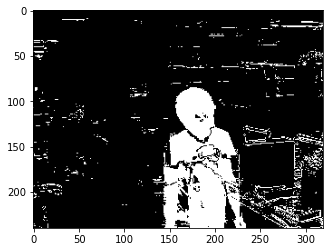

In [11]:
osize = 1 # オープニング用のカーネルサイズ
csize = 1 # クロージング用のカーネルサイズ

kernel = np.ones((osize,osize))
res = cv2.morphologyEx(fg, cv2.MORPH_OPEN, kernel)
kernel = np.ones((csize,csize))
res = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel)

plt.imshow(res, cmap='gray', vmin = 0, vmax = 255);

### 背景の合成

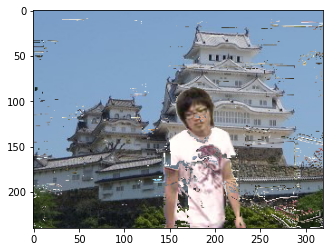

In [12]:
# 背景ファイルを読み込みとRGBの順番の入れ替え
imgc = cv2.imread('img07c.jpg')  # 姫路城の画像
imgc = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB)

# 背景の合成
merge = np.zeros( (240, 320, 3), dtype=np.uint8 )
merge[:,:,0] = np.where(res == 0, imgc[:,:,0], imgb[:,:,0])
merge[:,:,1] = np.where(res == 0, imgc[:,:,1], imgb[:,:,1])
merge[:,:,2] = np.where(res == 0, imgc[:,:,2], imgb[:,:,2])

plt.imshow(merge)